In [1]:
import keras
import keras.backend as K

Using TensorFlow backend.


In [2]:
import os

In [3]:
os.listdir('data')

['spec', 'super-raw', 'raw']

In [4]:
import numpy as np

In [5]:
x = np.load('data/spec/The Airborne Toxic Event-The Airborne Toxic Event Deluxe Edition-Happiness Is Overrated.mp3 - 107 sec.npy')

In [6]:
x

array([[  5.10694777e-07,   1.10282666e-06,   8.77621656e-07, ...,
          1.83597571e-07,   1.76248167e-05,   4.24043893e-06],
       [  9.08853106e-07,   2.40361369e-06,   1.43610808e-06, ...,
          1.34090250e-07,   3.23502642e-05,   6.28688850e-06],
       [  1.45927754e-06,   4.09228860e-06,   2.21396286e-06, ...,
          9.36392313e-08,   5.24146331e-05,   9.10984876e-06],
       ..., 
       [  6.94744062e-06,   1.33959007e-06,   1.39344060e-06, ...,
          1.05777076e-05,   6.23164437e-06,   4.16239555e-06],
       [  6.14303373e-06,   1.69865827e-06,   1.73036971e-06, ...,
          1.27627823e-05,   4.32768057e-06,   4.48100764e-06],
       [  5.30756535e-06,   2.09302689e-06,   1.99053286e-06, ...,
          1.48864400e-05,   2.88151596e-06,   4.90735290e-06]])

In [7]:
x.shape

(184, 1574)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
spec_dir = 'data/spec'
spectrograms = [os.path.join(spec_dir, f) for f in os.listdir(spec_dir)]

In [10]:
import random

In [11]:
from sklearn.preprocessing import maxabs_scale 

In [34]:
def load(f):
    return maxabs_scale(np.load(f)).transpose()[:256,:]

data/spec/Timothy Brindle-The Restoration-The Great Exchange Pt 1.mp3 - 65 sec.npy


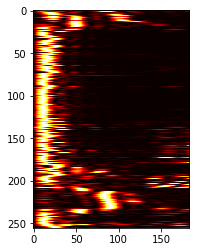

In [44]:
f = random.choice(spectrograms)
print(f)
x = load(f)
plt.imshow(x,  cmap='hot', interpolation='nearest')

In [17]:
from keras.models import Sequential
from keras.layers import Conv1D, Dense, MaxPool1D, UpSampling1D
model = Sequential([
    Conv1D(50, 128, padding='same', input_shape=(256, 184)),
    MaxPool1D(2, padding='same'),
    Conv1D(25, 64, padding='same'),
    MaxPool1D(2, padding='same'),
    Conv1D(12, 32, padding='same'),
    MaxPool1D(2, padding='same'),
    Conv1D(12, 32, padding='same'),
    UpSampling1D(2),
    Conv1D(25, 64, padding='same'),
    UpSampling1D(2),
    Conv1D(50, 128, padding='same', input_shape=(256, 184)),
    UpSampling1D(2),
    Conv1D(184, 1)
])

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 256, 50)           1177650   
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 128, 50)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 128, 25)           80025     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 64, 25)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 64, 12)            9612      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 32, 12)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 32, 12)            4620      
__________

In [19]:
model.compile(optimizer='adadelta', loss='binary_crossentropy')

In [24]:
def data_gen(files, batch_size):
    random.shuffle(files)
    X = np.zeros((batch_size, 256, 184))
    for i, f in enumerate(files):
        i = i % batch_size
        X[i,:] = load(f)
        if i == batch_size - 1:
            yield X, X
            X = np.zeros((batch_size, 256, 184))

In [25]:
batch_size = 30
steps = len(spectrograms) // batch_size
gen = data_gen(spectrograms, batch_size)
model.fit_generator(gen, steps_per_epoch=steps)

Epoch 1/1
731/731 [==============================] - 224s 306ms/step - loss: 0.7489


data/spec/James Brown-Greatest Hits-Its A Mans Mans Mans World.mp3 - 62 sec.npy


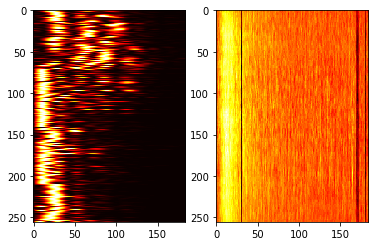

In [64]:
file = random.choice(spectrograms)
print(file)
x = load(file)
x_test = x.reshape(1, 256, 184)
pred = model.predict(x_test)
f, ax = plt.subplots(1, 2)
ax[0].imshow(x,  cmap='hot', interpolation='nearest')
ax[1].imshow(pred[0],  cmap='hot', interpolation='nearest')